<div style="padding:10px; 
            color:white;
            margin:10px;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 10px;
            border-style: solid;
            border-color: #e30613;
            background-color:#ae0f0a;
            overflow:hidden;
            font-weight:600">📚 Data Platform Engineering ⚙️</div>

# <font color=#ae0f0a>🎯 1. Architecture Diagram</font>

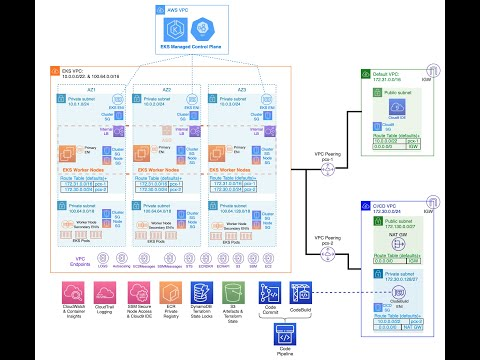

In [9]:
# !pip install diagrams
from IPython.display import Image, YouTubeVideo, HTML, Latex, Math, Markdown, SVG, JSON

YouTubeVideo('wknduYEJC10', width=700, height=300)

##  <font color=#ae0f0a>💎 1.1. 🚀 Reproducible Local Development with Dev Containers: VSCode, K8s, TF, Python/R </font> <a class="anchor" id="local-development-with-dev-containers"></a> [↑](#top)

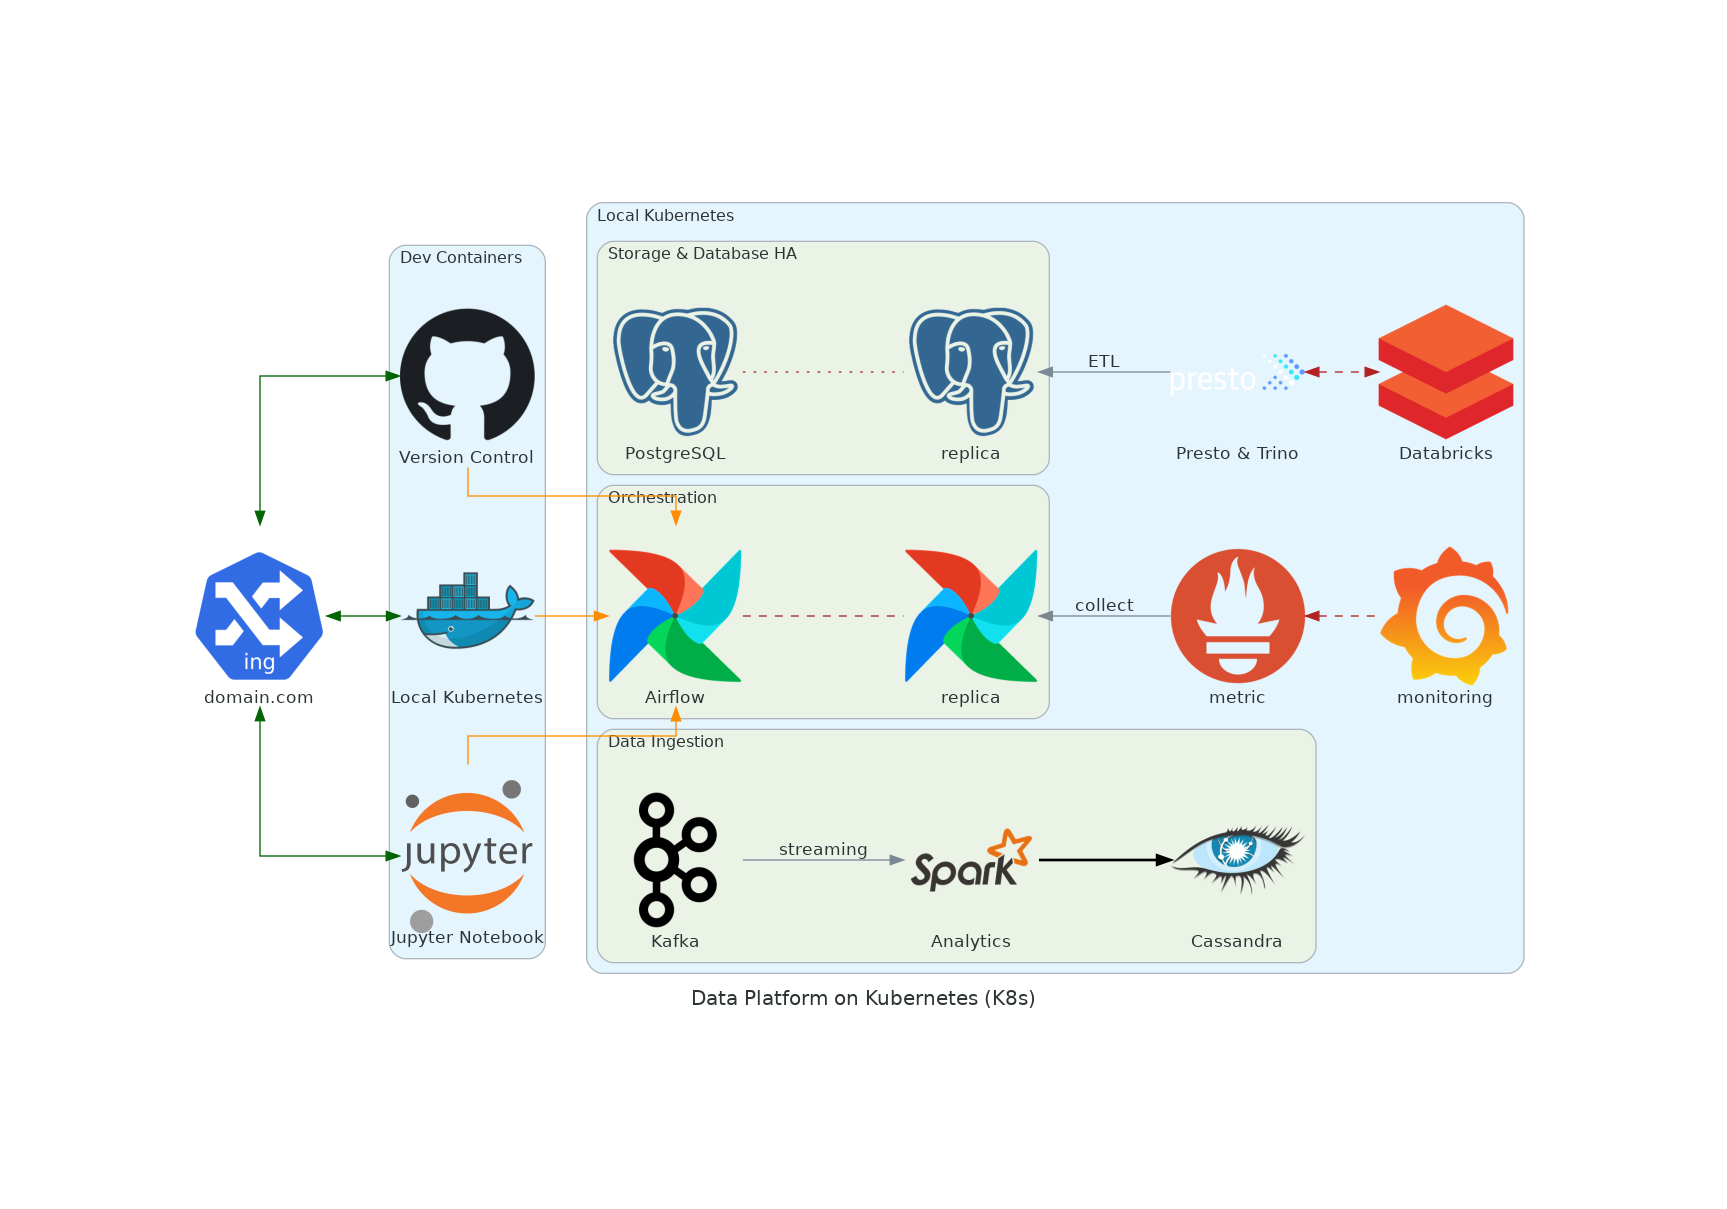

In [45]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.analytics import Spark, Presto, Databricks
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL, Cassandra
# from diagrams.onprem.inmemory import Redis
# from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.container import Docker
from diagrams.onprem.vcs import Github
from diagrams.onprem.gitops import Argocd, ArgoCD

from diagrams.k8s.network import Ingress

from diagrams.custom import Custom

# Custom icons should be placed in the "resources" directory under the current working directory
resources_path = "./resources"

# from diagrams.aws.compute import EKS
# from diagrams.aws.network import Route53, VPC, InternetGateway, NATGateway, ELB
# from diagrams.aws.database import RDS, Redshift
# from diagrams.aws.storage import S3, EFS
# from diagrams.aws.security import IAM, SecretsManager
# from diagrams.aws.analytics import EMR
# from diagrams.aws.ml import Sagemaker
# from diagrams.aws.management import Cloudwatch

with Diagram(name="Data Platform on Kubernetes (K8s)", filename="data_platform_on_k8s", show=False):
    ingress = Ingress("domain.com")

    with Cluster("Dev Containers"):
        dev_containers = [
            Github("Version Control"),
            Docker("Local Kubernetes"),
            Custom("Jupyter Notebook", f"{resources_path}/jupyter.svg")]

    with Cluster("Local Kubernetes"):
        # analytics = [
        #     Presto("Presto & Trino"),
        #     Databricks("Databricks")]
        analytics = Presto("Presto & Trino")
        analytics << Edge(color="firebrick", style="dashed") >> Databricks("Databricks")
        
        metrics = Prometheus("metric")
        metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

        with Cluster("Storage & Database HA"):
            primary = PostgreSQL("PostgreSQL")
            primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="ETL") << analytics
            # primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="collect") << metrics
            # dev_containers >> Edge(color="black") >> primary
        
        with Cluster("Orchestration"):
            orchestration = Airflow("Airflow")
            orchestration - Edge(color="brown", style="dashed") - Airflow("replica") << Edge(label="collect") << metrics
            # dev_containers >> Edge(color="brown") >> primary

        with Cluster("Data Ingestion"):
            aggregator = Kafka("Kafka")
            aggregator >> Edge(label="streaming") >> Spark("Analytics") >> Edge(color="black", style="bold") >> Cassandra("Cassandra")

    # dev_containers >> Edge(color="brown") >> Orchestration
    # dev_containers >> Edge(color="black") >> primary
    ingress >> Edge(color="darkgreen") << dev_containers >> Edge(color="darkorange") >> orchestration
    # ingress >> Edge(label="Internet") >> Github("Version Control")
    # ingress >> Edge(label="Engineer") >> Docker("Local Kubernetes")
    # ingress >> Edge(label="User")     >> Custom("Jupyter Notebook", f"{resources_path}/jupyter.svg")

Image(filename='data_platform_on_k8s.png')

In [48]:

from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL, Cassandra
# from diagrams.onprem.inmemory import Redis
# from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka
from diagrams.onprem.workflow import Airflow

from diagrams.aws.compute import EKS
from diagrams.aws.network import Route53, VPC, InternetGateway, NATGateway, ELB
from diagrams.aws.database import RDS, Redshift
from diagrams.aws.storage import S3, EFS
from diagrams.aws.security import IAM, SecretsManager
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.aws.management import Cloudwatch

with Diagram(name="Data Platform on Kubernetes (K8s)", filename="data_platform_on_k8s", show=False):
    dns = Route53("DNS")

    with Cluster("Public Subnets"):
        public_subnets = [
            NATGateway("NAT Gateway"),
            ELB("ALB ArgoCD"),
            ELB("ALB Shared")]

    with Cluster("Private Subnets - Kubernetes EKS"):
        metrics = Prometheus("metric")
        metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

        with Cluster("Orchestration"):
            primary = Airflow("Airflow")
            primary - Edge(color="brown", style="dashed") - Airflow("replica") << Edge(label="collect") << metrics
            public_subnets >> Edge(color="brown") >> primary

        with Cluster("Storage & Database HA"):
            primary = PostgreSQL("PostgreSQL")
            primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="collect") << metrics
            public_subnets >> Edge(color="black") >> primary

        with Cluster("Data Ingestion"):
            aggregator = Kafka("Kafka")
            aggregator >> Edge(label="streaming") >> Spark("Analytics") >> Edge(color="black", style="bold") >> Cassandra("Cassandra")

    dns >> Edge(color="darkgreen") << public_subnets >> Edge(color="darkorange") >> aggregator
    # dns >> Edge(label="Internet") >> NATGateway("NAT Gateway")
    # dns >> Edge(label="Engineer") >> ELB("ALB ArgoCD")
    # dns >> Edge(label="User")     >> ELB("ALB Shared")

In [33]:

from diagrams.onprem.ci import Jenkins  # Assuming Jenkins is used for CI/CD
from diagrams.onprem.vcs import Git  # Assuming Git is used for version control
from diagrams.custom import Custom

# Custom icons should be placed in the "resources" directory under the current working directory
resources_path = "./resources"

with Diagram("Platform Engineering on AWS", show=False):
    with Cluster("VPC"):
        internet = InternetGateway("Internet")
        nat = NATGateway("NAT Gateway")

        with Cluster("Private Subnets"):
            with Cluster("EKS"):
                eks = EKS("EKS")
                ci_cd = Jenkins("CI/CD")
                vcs = Git("Version Control")
                secrets_mgr = SecretsManager("Secrets Manager")

                with Cluster("Namespace system"):
                    system_components = [Custom("Component", f"{resources_path}/component_icon.png") for _ in range(3)]

                with Cluster("Namespace argocd"):
                    argocd_components = [Custom("Component", f"{resources_path}/component_icon.png") for _ in range(2)]

                with Cluster("Namespace app"):
                    app_components = [Custom("Component", f"{resources_path}/component_icon.png") for _ in range(2)]
                    secrets = SecretsManager("Secrets")

        with Cluster("Public Subnets"):
            alb = ELB("ALB")
            users = [Custom("Engineer", f"{resources_path}/user_icon.png"),
                     Custom("User", f"{resources_path}/user_icon.png")]

    db = RDS("RDS")
    storage = S3("S3")

    # Connecting components
    internet >> nat >> alb
    alb >> eks
    eks >> ci_cd
    eks >> vcs
    eks >> secrets_mgr
    eks - system_components
    eks - argocd_components
    eks - app_components
    eks >> db
    eks >> storage
    for user in users:
        user >> alb

# When the context manager exits, the diagram is saved to the current directory.


In [25]:

from diagrams.onprem.analytics import Spark
from diagrams.onprem.queue import Kafka
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom

icon_path = "/path/to/your/icons"  # Update this to the path where your custom icons are stored

with Diagram("Platform Engineering on K8s using Terraform on AWS", show=False):

    with Cluster("EKS Cluster"):
        eks = EKS("Amazon EKS")
        eks_services = [
            Kafka("Kafka"),
            Spark("Spark"),
            Custom("Airflow", f"{icon_path}/airflow.png"),
            Sagemaker("Sagemaker"),
            Prometheus("Prometheus"),
            Grafana("Grafana")
        ]

    with Cluster("Table Format Services"):
        table_formats = [
            Custom("Hudi", f"{icon_path}/hudi.png"),
            Custom("Iceberg", f"{icon_path}/iceberg.png"),
            Custom("Delta Lake", f"{icon_path}/delta_lake.png")
        ]

    with Cluster("AWS Managed Services"):
        managed_services = [
            EMR("EMR on EKS"),
            RDS("RDS"),
            Redshift("Redshift"),
            IAM("IAM")
        ]

    with Cluster("Storage Services"):
        storage = [
            S3("S3 Data Lake"),
            EFS("EFS")
        ]

    # Assume we are creating edges for illustrative purposes
    # This is where you'd connect your nodes as per the actual architecture
    eks >> table_formats
    eks >> managed_services
    eks >> storage

# After the with block ends, the diagram is rendered and the PNG file is saved in the current directory.


In [23]:
## 2. Data Platforms on Kubernetes (K8s)

from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, Redshift
from diagrams.aws.storage import S3, EFS
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.aws.management import Cloudwatch
from diagrams.aws.network import ELB
from diagrams.aws.security import IAM
from diagrams.onprem.analytics import Spark
from diagrams.onprem.queue import Kafka
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom

icon_path = "./icons"  # Path to the directory containing custom icons

with Diagram("Complete Architecture for Platform Engineering on K8s using Terraform on AWS", show=False):

    with Cluster("AWS Cloud"):
        # Amazon EKS Block
        with Cluster("Amazon EKS"):
            eks = EKS("EKS")
            eks_ingress = ELB("Ingress")
            eks_services = [Kafka("Kafka"), Spark("Spark")]
            eks_orchestration = Airflow("Airflow")
            eks_ml = Sagemaker("Sagemaker")
            eks_monitoring = [Prometheus("Prometheus"), Grafana("Grafana")]

        # Table Formats Block
        with Cluster("Table Formats"):
            table_formats = [
                Custom("Apache Hudi", f"{icon_path}/hudi.png"),
                Custom("Iceberg", f"{icon_path}/iceberg.png"),
                Custom("Delta Lake", f"{icon_path}/delta_lake.png")
            ]

        # AWS Managed Services Integration Block
        with Cluster("AWS Managed Services Integration"):
            managed_services = [
                EMR("EMR on EKS"),
                RDS("RDS"),
                Redshift("Redshift"),
                IAM("IAM")
            ]

        # Storage Block
        with Cluster("Storage"):
            storage_services = [S3("S3 Data Lake"), EFS("EFS")]

        # Interconnections within EKS Cluster
        eks_ingress >> eks_services
        eks >> eks_orchestration
        eks >> eks_ml
        eks >> eks_monitoring

        # Interconnections between EKS Cluster and Table Formats
        eks_services >> table_formats

        # Interconnections between EKS Cluster and AWS Managed Services
        eks_services >> managed_services

        # Interconnections between EKS Cluster and Storage Services
        eks_services >> storage_services

# The file will be saved as "complete_architecture_for_platform_engineering_on_k8s_using_terraform_on_aws.png" in the current directory.


TypeError: unsupported operand type(s) for >>: 'list' and 'list'

In [22]:


from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, Redshift
from diagrams.aws.storage import S3, EFS
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.custom import Custom

# Define the path to your custom icons if needed
icon_path = "./icons"

with Diagram("Platform Engineering on K8s using Terraform on AWS", show=False):

    with Cluster("Platform on Kubernetes"):
        with Cluster("Amazon EKS"):
            eks = EKS("EKS")
            # Add other EKS-related resources or nodes here if necessary

        with Cluster("Table Formats"):
            hudi = Custom("Apache Hudi", f"{icon_path}/hudi.png")
            iceberg = Custom("Iceberg", f"{icon_path}/iceberg.png")
            delta_lake = Custom("Delta Lake", f"{icon_path}/delta_lake.png")
            # Connect table format nodes to the EKS cluster or relevant data services

        with Cluster("AWS Managed Services Integration"):
            emr = EMR("EMR on EKS")
            rds = RDS("Amazon RDS")
            redshift = Redshift("Redshift")
            sagemaker = Sagemaker("SageMaker")
            # Include other managed services as needed

        with Cluster("Storage"):
            s3 = S3("S3 Data Lake")
            efs = EFS("EFS")
            # Add other storage services or nodes here

    # Define connections between nodes if necessary
    eks >> emr
    eks >> hudi
    eks >> iceberg
    eks >> delta_lake
    eks >> s3

# Ensure you have Graphviz installed and properly set up on your system
# Replace `platform_engineering_on_k8s.png` with the desired file path
# diagram.save("platform_engineering_on_k8s.png")


In [ ]:
## 1. https://cloudonaut.io/platform-engineering-on-aws-show-me-your-architecture-vol2/
## 1. Data Platform Engineering on AWS



In [20]:
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, Redshift, Dynamodb
from diagrams.aws.storage import S3
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.aws.management import Cloudwatch
from diagrams.aws.network import ELB
from diagrams.aws.security import IAM
from diagrams.onprem.analytics import Spark
from diagrams.onprem.queue import Kafka
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom

with Diagram("Data Platform on Kubernetes (K8s) using Terraform on AWS", show=False):

    with Cluster("AWS Cloud"):
        with Cluster("Amazon EKS"):
            eks = EKS("EKS")

            with Cluster("Data Ingestion"):
                kafka = Kafka("Kafka")

            with Cluster("Batch Processing"):
                spark = Spark("Spark")
                beam = Custom("Beam", "./icons/beam.png")
                dask = Custom("Dask", "./icons/dask.png")

            with Cluster("Stream Processing"):
                spark_streaming = Custom("Spark Streaming", "./icons/spark.png")
                kafka_streams = Custom("Kafka Streams", "./icons/kafka.png")
                flink = Custom("Flink", "./icons/flink.png")

            with Cluster("ML Platforms"):
                kubeflow = Custom("Kubeflow", "./icons/kubeflow.png")
                mlflow = Custom("MLflow", "./icons/mlflow.png")

            with Cluster("ML Frameworks"):
                tensorflow = Custom("TensorFlow", "./icons/tensorflow.png")
                pytorch = Custom("PyTorch", "./icons/pytorch.png")
                spark_ml = Custom("Spark ML", "./icons/spark.png")
                ray = Custom("Ray", "./icons/ray.png")

            with Cluster("Table Formats"):
                hudi = Custom("Hudi", "./icons/hudi.png")
                iceberg = Custom("Iceberg", "./icons/iceberg.png")
                delta_lake = Custom("Delta Lake", "./icons/delta_lake.png")

            with Cluster("Storage"):
                s3 = S3("S3 Data Lake")
                ebs = Custom("EBS", "./icons/ebs.png")
                efs = Custom("EFS", "./icons/efs.png")
                fsx = Custom("FSx", "./icons/fsx.png")

            with Cluster("Orchestration"):
                airflow = Airflow("Airflow")
                argo = Custom("Argo Workflows", "./icons/argo.png")
                prefect = Custom("Prefect", "./icons/prefect.png")

            with Cluster("K8s Batch Schedulers"):
                volcano = Custom("Volcano", "./icons/volcano.png")
                yunikorn = Custom("YuniKorn", "./icons/yunikorn.png")

            with Cluster("Query Engine"):
                presto = Custom("Presto", "./icons/presto.png")
                trino = Custom("Trino", "./icons/trino.png")

            with Cluster("Notebook"):
                jupyterhub = Custom("JupyterHub", "./icons/jupyter.png")

            with Cluster("Realtime OLAP"):
                pinot = Custom("Pinot", "./icons/pinot.png")

            with Cluster("NoSQL"):
                cassandra = Dynamodb("Cassandra")

        with Cluster("AWS Managed Services Integration"):
            emr_eks = EMR("EMR on EKS")
            rds = RDS("RDS")
            elasticache = ElastiCache("ElastiCache")
            opensearch = Custom("OpenSearch", "./icons/opensearch.png")
            redshift = Redshift("Redshift")
            dynamodb = Dynamodb("DynamoDB")
            sagemaker = Sagemaker("SageMaker")
            athena = Custom("Athena", "./icons/athena.png")
            iam = IAM("IAM")

        cloudwatch = Cloudwatch("Cloudwatch")
        elb = ELB("ELB")

    # Connections
    eks >> kafka
    eks >> [spark, beam, dask]
    eks >> [spark_streaming, kafka_streams, flink]
    eks >> [kubeflow, mlflow]
    eks >> [tensorflow, pytorch, spark_ml, ray]
    eks >> [hudi, iceberg, delta_lake]
    eks >> s3
    eks >> [airflow, argo, prefect]
    eks >> [volcano, yunikorn]
    eks >> [presto, trino]
    eks >> jupyterhub
    eks >> pinot
    eks >> cassandra
    eks >> [emr_eks, rds, elasticache, opensearch, redshift, dynamodb, sagemaker, athena, iam]
    eks >> cloudwatch
    eks >> elb

# The "./icons/" path should point to the directory where your custom icons are located.
# Replace "icon.png" with the actual file name of your icon.


In [19]:


from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, Redshift, Dynamodb
from diagrams.aws.storage import S3
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.aws.integration import SQS
from diagrams.aws.network import ELB
from diagrams.aws.management import Cloudwatch
from diagrams.onprem.analytics import Spark
from diagrams.onprem.queue import Kafka
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.workflow import Airflow
from diagrams.k8s.compute import Deployment
from diagrams.k8s.storage import PVC


with Diagram(name="Platform Engineering on Kubernetes (K8s) using Terraform on AWS", filename="platform_engineering_on_k8s_2", show=False):
    with Cluster("Data on EKS"):
        eks = EKS("Amazon EKS")

        with Cluster("Data Processing"):
            kafka = Kafka("Kafka")
            spark = Spark("Spark")
            beam = Custom("Beam", "./beam.png")
            dask = Custom("Dask", "./dask.png")

        with Cluster("Machine Learning"):
            kubeflow = Custom("Kubeflow", "./kubeflow.png")
            mlflow = Custom("MLflow", "./mlflow.png")
            sagemaker = Sagemaker("SageMaker")

        with Cluster("Storage and Formats"):
            hudi = Custom("Hudi", "./hudi.png")
            iceberg = Custom("Iceberg", "./iceberg.png")
            delta_lake = Custom("Delta Lake", "./delta_lake.png")
            s3 = S3("S3")

        with Cluster("Orchestration and Scheduling"):
            airflow = Airflow("Airflow")
            volcano = Custom("Volcano", "./volcano.png")
            yunikorn = Custom("Yunikorn", "./yunikorn.png")

        with Cluster("Query and Data Management"):
            presto = Custom("Presto", "./presto.png")
            trino = Custom("Trino", "./trino.png")
            cassandra = Dynamodb("Cassandra")  # DynamoDB as placeholder for Cassandra
            pinot = Custom("Pinot", "./pinot.png")

        with Cluster("AWS Managed Services Integration"):
            emr = EMR("EMR on EKS")
            rds = RDS("RDS")
            elasticache = Custom("ElastiCache", "./elasticache.png")
            opensearch = Custom("OpenSearch", "./opensearch.png")
            redshift = Redshift("Redshift")

    with Cluster("Monitoring and Security"):
        prometheus = Prometheus("Prometheus")
        grafana = Grafana("Grafana")
        cloudwatch = Cloudwatch("Cloudwatch")
        iam = Custom("IAM", "./iam.png")

    # Interactions between components
    eks >> kafka
    eks >> spark
    eks >> beam
    eks >> dask
    eks >> kubeflow
    eks >> mlflow
    eks >> sagemaker
    eks >> hudi
    eks >> iceberg
    eks >> delta_lake
    eks >> s3
    eks >> airflow
    eks >> volcano
    eks >> yunikorn
    eks >> presto
    eks >> trino
    eks >> cassandra
    eks >> pinot
    eks >> emr
    eks >> rds
    eks >> elasticache
    eks >> opensearch
    eks >> redshift
    eks >> prometheus
    eks >> grafana
    eks >> cloudwatch
    eks >> iam

# Execute the script to create the diagram
# The "./" in the Custom icons should point to the directory where your custom icons are located.



In [18]:


from diagrams import Cluster, Diagram
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, Redshift
from diagrams.aws.storage import S3
from diagrams.aws.analytics import EMR
from diagrams.aws.ml import Sagemaker
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.compute import Pod
from diagrams.k8s.network import Ingress, Service
from diagrams.k8s.storage import PersistentVolume
from diagrams.k8s.ecosystem import Helm
from diagrams.onprem.queue import Kafka
from diagrams.onprem.monitoring import Prometheus, Grafana
from diagrams.onprem.analytics import Spark
from diagrams.saas.analytics import Snowflake

with Diagram(name="Data Platform on Kubernetes (K8s)", 
             filename="platform_engineering_on_k8s_1", 
             show=False):
    with Cluster("Kubernetes Cluster"):
        ingress = Ingress("ingress")
        with Cluster("Pods"):
            services = [Service("service1"),
                        Service("service2"),
                        Service("service3")]

        pv = PersistentVolume("persistent volume")

        with Cluster("K8s Operators"):
            helm = Helm("helm charts")
            spark_operator = Pod("spark operator")
            kafka_operator = Pod("kafka operator")

        with Cluster("Data Processing"):
            spark = Spark("Spark")
            kafka = Kafka("Kafka")

        with Cluster("Data Storage"):
            s3 = S3("Data Lake")
            rds = RDS("Relational Database")
            redshift = Redshift("Data Warehouse")

        with Cluster("Machine Learning"):
            ml = Sagemaker("SageMaker")

        with Cluster("Monitoring"):
            prometheus = Prometheus("Prometheus")
            grafana = Grafana("Grafana")

    with Cluster("External Data Services"):
        snowflake = Snowflake("Snowflake")

    # Interactions Between Components
    ingress >> services >> pv
    services >> helm >> spark_operator
    services >> helm >> kafka_operator
    spark_operator >> spark
    kafka_operator >> kafka
    spark >> s3
    kafka >> s3
    s3 >> redshift
    s3 >> rds
    services >> ml
    prometheus >> grafana
    services >> prometheus
    s3 >> snowflake

## When the context manager exits, the diagram is automatically rendered and saved the diagram as a PNG file.
## Ensure you have Graphviz installed and properly set up on your system.


In [ ]:
from diagrams import Diagram, Cluster, Edge
from diagrams.aws.compute import EKS
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ALB, NATGateway, InternetGateway
from diagrams.aws.storage import S3
from diagrams.k8s.compute import Deployment
from diagrams.k8s.network import Ingress, Service
from diagrams.k8s.infra import Master, Node
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.ecosystem import Helm  # Placeholder for ArgoCD
from diagrams.k8s.group import Namespace
from diagrams.k8s.podconfig import Secret

with Diagram(name="Platform Engineering on Kubernetes using Terraform on AWS", 
             filename="platform_engineering_on_k8s_2", 
             show=False):

    internet = InternetGateway("Internet")
    user = Service("User")
    engineer = Service("Engineer")

    with Cluster("AWS VPC"):
        with Cluster("Private Subnets"):
            with Cluster("EKS Cluster"):
                with Namespace("system"):
                    system_services = [Deployment("external-dns"),
                                       Deployment("aws-load-balancer-controller")]
                with Namespace("argocd"):
                    argocd = Helm("Argo CD")  # Placeholder for ArgoCD
                with Namespace("app"):
                    app_deployment = Deployment("app-1")
                    app_secrets = Secret("Secrets")

        with Cluster("Public Subnets"):
            nat_gw = NATGateway("NAT Gateway")
            alb_argo = ALB("ALB Argo CD")
            alb_shared = ALB("ALB Shared")

        rds = RDS("Amazon RDS")
        cache = ElastiCache("ElastiCache")
        s3 = S3("S3")

    internet >> user >> alb_shared
    internet >> engineer >> alb_argo
    alb_argo >> argocd
    alb_shared >> app_deployment
    app_deployment >> rds
    app_deployment >> cache
    app_deployment >> s3


In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS, Fargate
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.ecosystem import ArgoCD
from diagrams.onprem.vcs import Github
from diagrams.onprem.ci import Jenkins
from diagrams.onprem.iac import Terraform
from diagrams.aws.integration import SQS

with Diagram("Platform Engineering on AWS with Kubernetes", filename="platform_engineering_on_k8s_111", show=False):
    with Cluster("AWS Cloud"):
        with Cluster("VPC"):
            with Cluster("Private Subnets"):
                eks = EKS("EKS")
                eks_managed_node_groups = Fargate("EKS Managed Node Groups")

            with Cluster("Public Subnets"):
                alb = ELB("ALB")

        with Cluster("Managed Services"):
            rds = RDS("Amazon RDS")
            elasticache = ElastiCache("Amazon ElastiCache")
            opensearch = S3("Amazon OpenSearch")
            s3 = S3("Amazon S3")

        argocd = ArgoCD("Argo CD")
        spacelift = Terraform("Spacelift")
        sops_operator = Jenkins("SOPS Operator")

    github = Github("GitHub")
    cloudwatch = Cloudwatch("Cloudwatch")
    sqs = SQS("SQS")

    eks >> eks_managed_node_groups
    eks_managed_node_groups >> rds
    eks_managed_node_groups >> elasticache
    eks_managed_node_groups >> opensearch
    eks_managed_node_groups >> s3
    eks_managed_node_groups >> argocd >> github
    eks >> spacelift >> cloudwatch
    eks >> sops_operator >> sqs

# The "show=False" attribute prevents the diagram from automatically opening after creation.
# You can save the diagram using diagram.save("path/to/file.png")
# Ensure you have Graphviz installed and properly set up on your system.


In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS, Fargate
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.ecosystem import Helm  # Placeholder for ArgoCD
from diagrams.onprem.vcs import Github
from diagrams.onprem.ci import Jenkins
from diagrams.onprem.iac import Terraform
from diagrams.aws.integration import SQS

with Diagram("Platform Engineering on AWS with Kubernetes", filename="platform_engineering_on_k8s_111", show=False):
    with Cluster("AWS Cloud"):
        with Cluster("VPC"):
            with Cluster("Private Subnets"):
                eks = EKS("EKS")
                eks_managed_node_groups = Fargate("EKS Managed Node Groups")

            with Cluster("Public Subnets"):
                alb = ELB("ALB")

        with Cluster("Managed Services"):
            rds = RDS("Amazon RDS")
            elasticache = ElastiCache("Amazon ElastiCache")
            opensearch = S3("Amazon OpenSearch")  # Using S3 as a placeholder for OpenSearch
            s3 = S3("Amazon S3")

        argocd = Helm("Argo CD")  # Placeholder for ArgoCD
        spacelift = Terraform("Spacelift")
        sops_operator = Jenkins("SOPS Operator")  # Using Jenkins as a placeholder

    github = Github("GitHub")
    cloudwatch = Cloudwatch("Cloudwatch")
    sqs = SQS("SQS")

    eks >> eks_managed_node_groups
    eks_managed_node_groups >> rds
    eks_managed_node_groups >> elasticache
    eks_managed_node_groups >> opensearch
    eks_managed_node_groups >> s3
    eks_managed_node_groups >> argocd >> github
    eks >> spacelift >> cloudwatch
    eks >> sops_operator >> sqs

# Save the diagram as a PNG file
# Ensure you have Graphviz installed and properly set up on your system.
diagram.save("platform_engineering_on_k8s_111.png")

In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS, Fargate
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.ecosystem import Helm  # Placeholder for ArgoCD
from diagrams.onprem.vcs import Github
from diagrams.onprem.ci import Jenkins
from diagrams.onprem.iac import Terraform
from diagrams.aws.integration import SQS

with Diagram(name="Platform Engineering on AWS with Kubernetes",
             filename="platform_engineering_on_k8s_222",
             show=False):
    
    with Cluster("AWS Cloud"):
        with Cluster("VPC"):
            with Cluster("Private Subnets"):
                eks = EKS("EKS")
                eks_managed_node_groups = Fargate("EKS Managed Node Groups")

            with Cluster("Public Subnets"):
                alb = ELB("ALB")

        with Cluster("Managed Services"):
            rds = RDS("Amazon RDS")
            elasticache = ElastiCache("Amazon ElastiCache")
            opensearch = S3("Amazon OpenSearch")  # Using S3 as a placeholder for OpenSearch
            s3 = S3("Amazon S3")

        argocd = Helm("Argo CD")  # Placeholder for ArgoCD
        spacelift = Terraform("Spacelift")
        sops_operator = Jenkins("SOPS Operator")  # Using Jenkins as a placeholder

    github = Github("GitHub")
    cloudwatch = Cloudwatch("Cloudwatch")
    sqs = SQS("SQS")

    eks >> eks_managed_node_groups
    eks_managed_node_groups >> rds
    eks_managed_node_groups >> elasticache
    eks_managed_node_groups >> opensearch
    eks_managed_node_groups >> s3
    eks_managed_node_groups >> argocd >> github
    eks >> spacelift >> cloudwatch
    eks >> sops_operator >> sqs

# Save the diagram as a PNG file
# diag.save("platform_engineering_on_k8s_111.png")


In [ ]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EKS, Fargate
from diagrams.aws.database import RDS, ElastiCache
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3
from diagrams.aws.management import Cloudwatch
from diagrams.k8s.ecosystem import Helm  # Placeholder for ArgoCD
from diagrams.onprem.vcs import Github
from diagrams.onprem.ci import Jenkins
from diagrams.onprem.iac import Terraform
from diagrams.aws.integration import SQS

# The filename parameter specifies the name of the output file
with Diagram(name="Platform Engineering on AWS with Kubernetes",
             filename="platform_engineering_on_k8s_111",
             show=False):
    with Cluster("AWS Cloud"):
        with Cluster("VPC"):
            with Cluster("Private Subnets"):
                eks = EKS("EKS")
                eks_managed_node_groups = Fargate("EKS Managed Node Groups")

            with Cluster("Public Subnets"):
                alb = ELB("ALB")

        with Cluster("Managed Services"):
            rds = RDS("Amazon RDS")
            elasticache = ElastiCache("Amazon ElastiCache")
            opensearch = S3("Amazon OpenSearch")  # Using S3 as a placeholder for OpenSearch
            s3 = S3("Amazon S3")

        argocd = Helm("Argo CD")  # Placeholder for ArgoCD
        spacelift = Terraform("Spacelift")
        sops_operator = Jenkins("SOPS Operator")  # Using Jenkins as a placeholder

    github = Github("GitHub")
    cloudwatch = Cloudwatch("Cloudwatch")
    sqs = SQS("SQS")

    eks >> eks_managed_node_groups
    eks_managed_node_groups >> rds
    eks_managed_node_groups >> elasticache
    eks_managed_node_groups >> opensearch
    eks_managed_node_groups >> s3
    eks_managed_node_groups >> argocd >> github
    eks >> spacelift >> cloudwatch
    eks >> sops_operator >> sqs

# When the context manager exits, the diagram is automatically rendered and saved.


<div class="alert alert-block alert-success">  
    The purpose of this Jupyter Notebook is to provide solutions for ...
</div>